### Assignment 1

In [242]:
import re
import nltk
import html
import pandas as pd
from nltk.stem import *
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import words
nltk.download("words")
nltk.download("stopwords")
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package words to /Users/Izzy_0911/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Izzy_0911/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Data cleaning

1. Removed all the html tags and attributes.
2. Replaced all the html character codes with ASCII.
3. Removed all the URLs.
4. All characters in the text are in lowercase.
5. Removed all the stopwords with both stopwords list from nltk package and stop_list.txt.
6. Keep all the empty tweets

### Clean the generic tweets data

In [159]:
def clean_data(file):
    # remove html tags and attributes
    clean = re.compile('/<[^>]+>/')
    file_tag = re.sub(clean, '', file)
    
    # replace html character codes with ASCII
    file_char = html.unescape(file_tag)

    # remove URLs
    file_url = re.sub(r"http\S+", "", file_char)

    # lowercase
    file_low = file_url.lower()
    return file_low

In [160]:
generic_file = pd.read_csv('generic_tweets.txt', encoding = 'utf-8')
generic_text = generic_file['text']
half_clean_generic = []
for text in generic_text:
    clean_generic_text = clean_data(text)
    half_clean_generic.append(clean_generic_text)

In [161]:
clean_generic = []
tokenizer = RegexpTokenizer(r'\w+')
stop_words_1 = set(stopwords.words('english'))
stop_words = open('stop_words.txt', 'r', encoding = 'utf-8').read()
stop_words_2 = ' '.join(' '.join(stop_words.split('\t')).split('\n')).split()
stop_words_2

for i in half_clean_generic:
    file_token = tokenizer.tokenize(i)
    file_stop_1 = [word for word in file_token if not word in stop_words_1]
    file_stop_2 = [word for word in file_stop_1 if not word in stop_words_2]
    clean_generic.append(file_stop_2)

In [162]:
cleaned_generic = []
for t in clean_generic:
    tw = ' '.join(t)
    cleaned_generic.append(tw)

In [238]:
def count_words(file):
    word_counter = Counter()
    for tw in file:
        file_words = tokenizer.tokenize(tw)
        word_counter.update(file_words)
    return word_counter

count_feature_1 = count_words(cleaned_generic)
len(count_feature_1)

139612

### Clean the US airline tweets data

In [164]:
airline_file = pd.read_csv('US_airline_tweets.csv', sep=',')
airline_text = airline_file['text']

In [165]:
half_clean_airline = []
for text in airline_text:
    clean_airline_text = clean_data(text)
    half_clean_airline.append(clean_airline_text)

In [166]:
clean_airline = []
for i in half_clean_airline:
    file_token = tokenizer.tokenize(i)
    file_stop_1 = [word for word in file_token if not word in stop_words_1]
    file_stop_2 = [word for word in file_stop_1 if not word in stop_words_2]
    clean_airline.append(file_stop_2)

In [167]:
cleaned_airline = []
for t in clean_airline:
    tw = ' '.join(t)
    cleaned_airline.append(tw)

In [239]:
count_feature_2 = count_words(cleaned_airline)
len(count_feature_2)

11639

# Q2. Exploratory analysis

In [168]:
at = []
tag = []
for t in airline_text:
    text = t.lower()
    for word in text.split():
        if word.startswith('@'):
            at.append(word)
        if word.startswith('#'):
            tag.append(word)

In [169]:
count_at = Counter(at)
count_tag = Counter(tag)

In [170]:
count_at.most_common(10)

[('@united', 3079),
 ('@usairways', 2554),
 ('@americanair', 2402),
 ('@southwestair', 1735),
 ('@jetblue', 1431),
 ('@virginamerica', 328),
 ('@', 60),
 ('@delta', 54),
 ('@united,', 28),
 ('@jetblue:', 24)]

In [171]:
count_tag.most_common(10)

[('#', 77),
 ('#fail', 64),
 ('#jetblue', 42),
 ('#unitedairlines', 39),
 ('#customerservice', 34),
 ('#destinationdragons', 29),
 ('#usairways', 29),
 ('#neveragain', 26),
 ('#united', 25),
 ('#usairwaysfail', 25)]

In [172]:
# united = ['united','unitedairlines','unitedsucks','unitedfail','unitedair','unitedairline']
# usairways = ['usairways','usairway','usair']
# americanair = ['americanair','americanairlines']
# southwestair = ['southwestair','southwest','southwestairline','southwestairlines']
# jetblue = ['jetblue','jetbluerocks']
# virginamerica = ['virginamerica','virgin','virginair','virginairline']
# delta = ['delta','deltaair','deltaairline','deltair']

countlist = []
def count_list(cleaned_list):
    countlist = []
    for i in cleaned_list:
        words = i.split()
        if 'americanair' in words:
            countlist.append('americanair')
            continue
    
        elif 'delta' in words:
            countlist.append('delta')
            continue
        
        elif 'jetblue' in words:
            countlist.append('jetblue')
            continue
            
        elif 'southwestair' in words:
            countlist.append('southwestair')
            continue
            
        elif 'united' in words:
            countlist.append('united')
            continue
            
        elif 'usairways' in words:
            countlist.append('usairways')
            continue
            
        elif 'virginamerica' in words:
            countlist.append('virginamerica')
            continue
        else:
            countlist.append('others')
    return countlist

In [173]:
count_a = count_list(cleaned_airline)
count_airline = Counter(count_a)
count_airline

Counter({'americanair': 2453,
         'delta': 63,
         'jetblue': 1497,
         'others': 4,
         'southwestair': 1748,
         'united': 3082,
         'usairways': 2365,
         'virginamerica': 329})

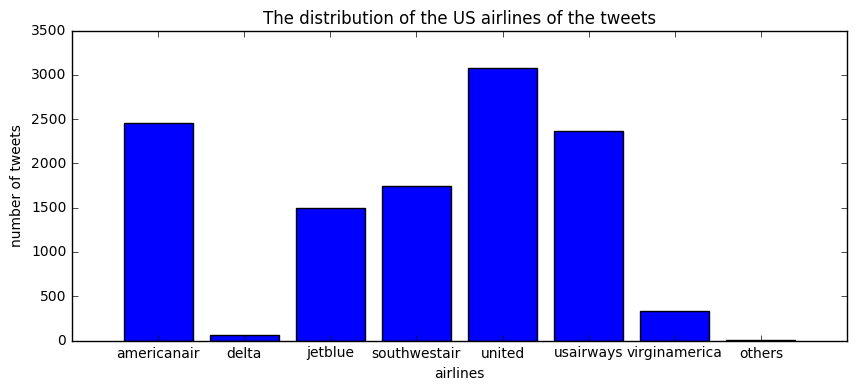

In [174]:
key_list = ['americanair', 'delta', 'jetblue', 'southwestair', 'united', 'usairways', 'virginamerica', 'others']
bar_height = []
for key in key_list:
    bar_height.append(count_airline[key])
a = list(range(1, len(count_airline)+1))
plt.figure(figsize=(10,4))
plt.bar(a, bar_height, align='center')
plt.xticks(a, key_list)
plt.ylabel('number of tweets')
plt.xlabel('airlines')
plt.title('The distribution of the US airlines of the tweets')
plt.show()

The distribution plot of the US airlines of the tweets shows that American Air, United and US Air Ways are most frequently mentioned in the CSV file US_airline_tweets, while Delta airline and Virgin America are barely mentioned. 

In [175]:
generic_file['text'] = cleaned_generic[:]

In [176]:
count_g = count_list(cleaned_generic)
generic_file['airline'] = count_g
generic_file.head()

,class,id,date,query,user,text,airline
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww bummer shoulda david carr thir...,others
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting cry result schoo...,others
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived times ball managed save 50 rest...,others
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,body feels itchy fire,others
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behaving mad,others


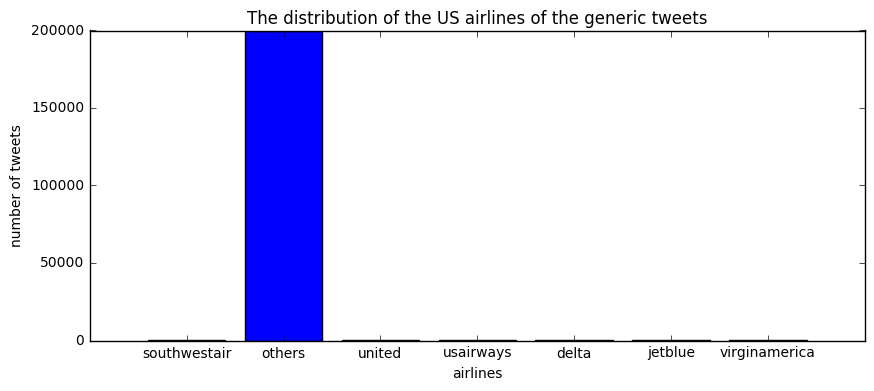

In [212]:
count_g_airline = Counter(count_g)
keys = count_g_airline.keys()
height = []
for key in keys:
    height.append(count_g_airline[key])
a = list(range(1, len(count_g_airline)+1))
plt.figure(figsize=(10,4))
plt.bar(a, height, align='center')
plt.xticks(a, keys)
plt.ylabel('number of tweets')
plt.xlabel('airlines')
plt.title('The distribution of the US airlines of the generic tweets')
plt.show()

/Users/Izzy_0911/anaconda3/lib/python3.5/site-packages/pandas/tools/plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


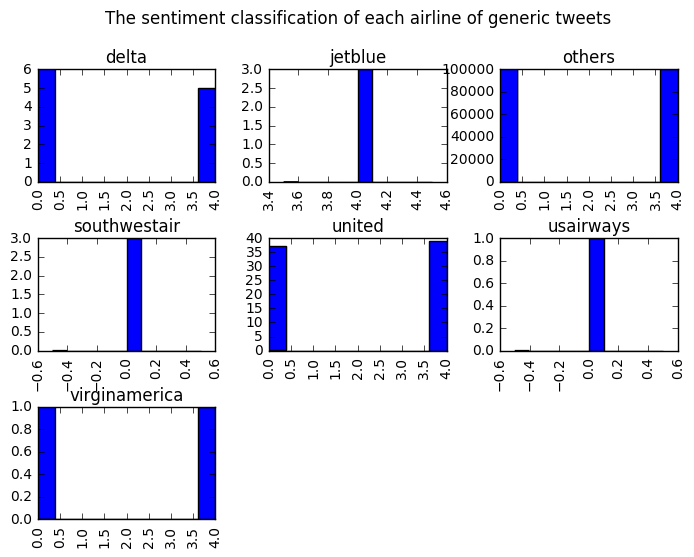

In [228]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca()
generic_file.hist('class', by = 'airline', ax = ax)
plt.suptitle('The sentiment classification of each airline of generic tweets', x=0.5, y=1, ha='center', fontsize='large')

The distribution plot of the US airlines of the generic tweets is meaningless, since only a few US airlines are mentioned in the text of tweets. The sentiment classification of each airline based on generic tweets data is also meaningless, because the US-airlines dataset is too small.

### Word cloud for generic text

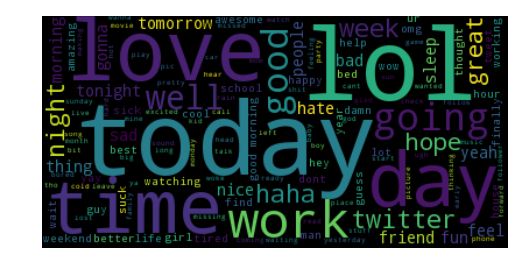

In [267]:
g = generic_file.text
g_text = " ".join(tw for tw in g)

wordcloud = WordCloud().generate(g_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [178]:
airline_file['text'] = cleaned_airline
airline_file['airline'] = count_a
sentiment = airline_file['sentiment']
CLASS = []
for i in sentiment:
    if i == 'positive':
        CLASS.append(4)
    else:
        CLASS.append(0)
airline_file['class'] = CLASS
airline_file.head()

,﻿id,sentiment,negative_reason,user,retweet_count,text,airline,class
0,5.703010e+17,positive,NaN,jnardino,0,virginamerica commercials experience tacky,virginamerica,4
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious enter...,virginamerica,0
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica big bad thing,virginamerica,0
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously pay 30 flight seats pl...,virginamerica,0
4,5.703010e+17,positive,NaN,cjmcginnis,0,virginamerica time fly vx â œear wormâ wonâ,virginamerica,4


/Users/Izzy_0911/anaconda3/lib/python3.5/site-packages/pandas/tools/plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


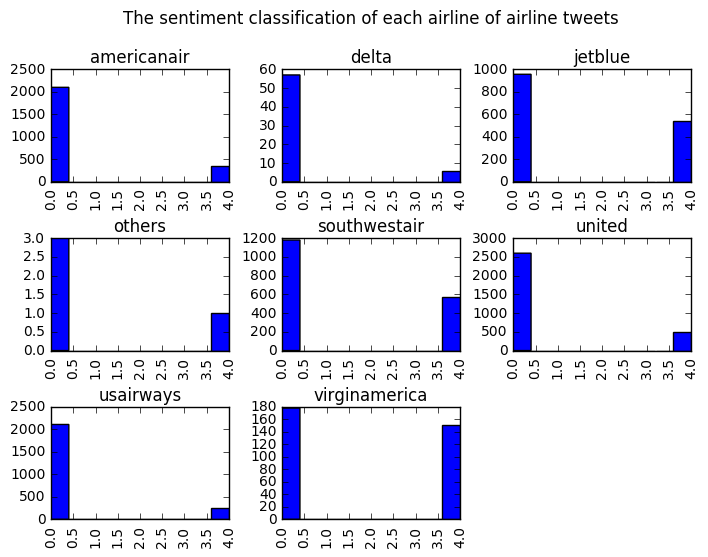

In [227]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca()
airline_file.hist('class', by = 'airline', ax = ax)
plt.suptitle('The sentiment classification of each airline of airline tweets', x=0.5, y=1, ha='center', fontsize='large')

In the plots above, we let indicator 0 to represent negative sentiment and the indicator 1 to represent possitive sentiment. Based on the sentiment distribution plot of each airline, we can say that the proportion of tweets with negative sentiment is obviously higher than the proportion of tweets with positive sentiment in each airline. Based on the US airline tweets, most of the tweets are with negative sentiment. Moreover, the rates of positive tweets are higher when the text mentioned virginamerica and jetblue.

### Word cloud for American Air

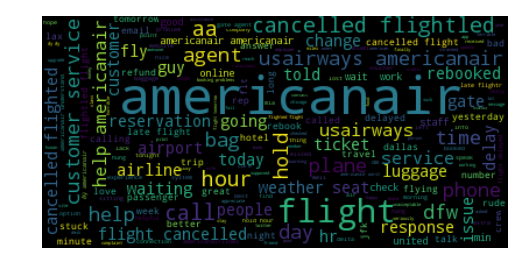

In [256]:
a = airline_file[airline_file['airline'].isin(['americanair'])]['text']
a_text = " ".join(tw for tw in a)

wordcloud = WordCloud().generate(a_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word cloud for Delta 

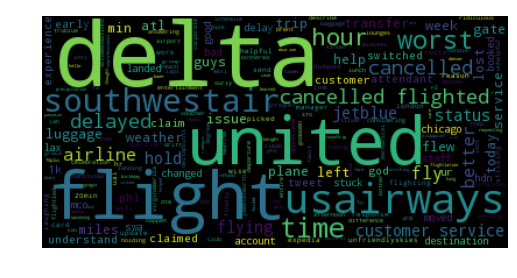

In [255]:
d = airline_file[airline_file['airline'].isin(['delta'])]['text']
d_text = " ".join(tw for tw in d)

wordcloud = WordCloud().generate(d_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word cloud for Jetblue

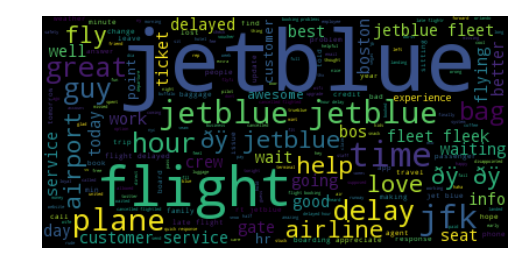

In [260]:
j = airline_file[airline_file['airline'].isin(['jetblue'])]['text']
j_text = " ".join(tw for tw in j)

wordcloud = WordCloud().generate(j_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word cloud for Southwest Air

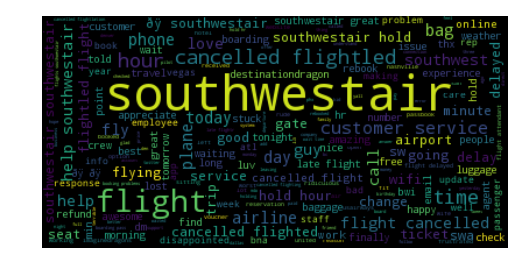

In [261]:
s = airline_file[airline_file['airline'].isin(['southwestair'])]['text']
s_text = " ".join(tw for tw in s)

wordcloud = WordCloud().generate(s_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word cloud for United Airline

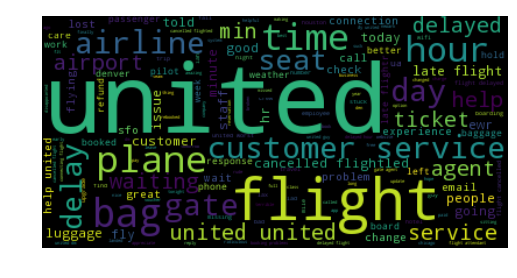

In [262]:
united = airline_file[airline_file['airline'].isin(['united'])]['text']
united_text = " ".join(tw for tw in united)

wordcloud = WordCloud().generate(united_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word cloud for US Air Ways

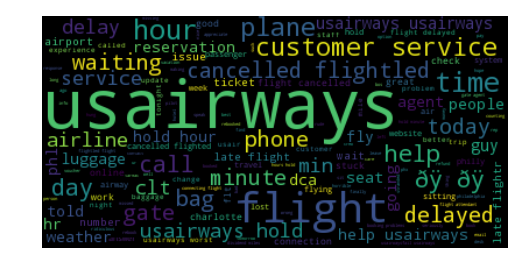

In [264]:
us = airline_file[airline_file['airline'].isin(['usairways'])]['text']
us_text = " ".join(tw for tw in us)

wordcloud = WordCloud().generate(us_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word cloud for Virgin America

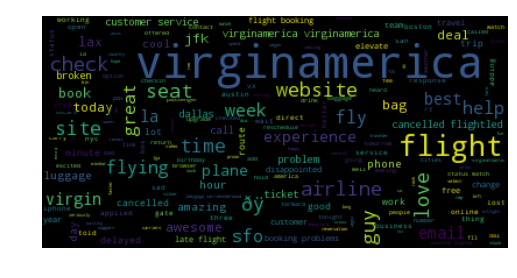

In [266]:
v = airline_file[airline_file['airline'].isin(['virginamerica'])]['text']
v_text = " ".join(tw for tw in v)

wordcloud = WordCloud().generate(v_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Q3. Model preparation

In [232]:
X_g = generic_file['text']
y_g = generic_file['class']
cv = CountVectorizer(binary=True)
cv.fit(X_g)
X_matrix_g = cv.transform(X_g)
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_matrix_g,y_g,test_size=0.3)
print(X_matrix_g.todense())

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


We created a sparse matrix (values on most positions are 0) contains only 0 and 1. Each row of the matrix represents a tweet and the columns of matrix represents the all tweets words. If the tweet contains the word, then the position of this word contains 1; if the tweet does not contain the word, then the position of this word contains 0. So we use the frequency of each word as the features of the model. Each tweet is considered as a single observation, and the outcome variable is the sentiment value.

# Q4. Model implementation

In [235]:
for param in [0.001, 0.01, 0.1, 0.5, 1, 10, 100]:
    clf = LogisticRegression(C=param).fit(X_train_g, y_train_g)
    y_pred_g = clf.predict(X_test_g)
    test_accuracy_g = accuracy_score(y_test_g, y_pred_g)
    print ("Accuracy for C=%s: %s" % (param, test_accuracy_g))

Accuracy for C=0.001: 0.696016666667
Accuracy for C=0.01: 0.724983333333
Accuracy for C=0.1: 0.73945
Accuracy for C=0.5: 0.742
Accuracy for C=1: 0.7407
Accuracy for C=10: 0.725466666667
Accuracy for C=100: 0.703316666667


The cleaned generic tweets dataset has been split into training set (70%) and test set (30%). Train a logistic regression model on the training data and apply the model to the test data. The highest accuracy appears when the hyperparameter is 0.5, and the accuracy value would be 0.742. 

In [237]:
air_text = airline_file['text']
y_test_air = airline_file['class']
X_test_air = cv.transform(air_text)
print(X_test_air.todense())

for param in [0.001, 0.01, 0.1, 0.5, 1, 10, 100]:
    clf = LogisticRegression(C=param).fit(X_train_g, y_train_g)
    y_pred_air = clf.predict(X_test_air)
    test_accuracy = accuracy_score(y_test_air, y_pred_air)
    print ("Accuracy for C=%s: %s" % (param, test_accuracy))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
Accuracy for C=0.001: 0.721601247726
Accuracy for C=0.01: 0.724807209081
Accuracy for C=0.1: 0.748115414609
Accuracy for C=0.5: 0.75496057534
Accuracy for C=1: 0.750888137943
Accuracy for C=10: 0.728013170436
Accuracy for C=100: 0.694133957196


Evaluate the same model, which is generated by the generic_tweets, on the US airline data. The highest accuracy appears when the hyperparameter is 0.5, and the accuracy value would be 0.754. Based on the same model, the accuracy of prediction would be higher in the airline data than in the generic data. The reason is that the generic dataset contains 139612 features while the airline datatset contains only 11639 features. Too many features will cause overfitting problem and increase the probability of misclassificastion. Therefore, the accuracy of prediction based on a dataset with too many features would be lower. 

### Discussion

To improve the realiability of test accuracy, we can run the logistic regression for multiple times and get the mean test accuracy value. We can also train our model with less features, such as selecting the top 500 most common words appeared in the tweets dataset, to reduce the overfitting problem and get a more accurate prediction.

## negative US airline tweets

In [183]:
negative_air = airline_file[airline_file['sentiment'].isin(['negative'])]
negative = Counter(negative_air['negative_reason'])
negative

Counter({'Bad Flight': 580,
         "Can't Tell": 1190,
         'Cancelled Flight': 847,
         'Customer Service Issue': 2910,
         'Damaged Luggage': 74,
         'Flight Attendant Complaints': 481,
         'Flight Booking Problems': 529,
         'Late Flight': 1665,
         'Lost Luggage': 724,
         'longlines': 178})

### With 10 classes

In [184]:
reasons1 = []
for reason in airline_file['negative_reason']:
    if reason == 'Bad Flight':
        reasons1.append(0)
        
    elif reason == "Can't Tell":
        reasons1.append(1)
    
    elif reason == 'Cancelled Flight':
        reasons1.append(2)
        
    elif reason == 'Customer Service Issue':
        reasons1.append(3)
        
    elif reason == 'Damaged Luggage':
        reasons1.append(4)
        
    elif reason == 'Flight Attendant Complaints':
        reasons1.append(5)
        
    elif reason == 'Flight Booking Problems':
        reasons1.append(6)
        
    elif reason == 'Late Flight':
        reasons1.append(7)
        
    elif reason == 'Lost Luggage':
        reasons1.append(8)
    
    elif reason == 'longlines':
        reasons1.append(9)
    
    else:
        reasons1.append('NaN')

In [185]:
airline_file['reasons_1'] = reasons1
negative_air = airline_file[airline_file['sentiment'].isin(['negative'])]
negative_air.head()

,﻿id,sentiment,negative_reason,user,retweet_count,text,airline,class,reasons_1
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious enter...,virginamerica,0,0
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica big bad thing,virginamerica,0,1
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously pay 30 flight seats pl...,virginamerica,0,1
11,5.702820e+17,negative,Late Flight,smartwatermelon,0,virginamerica sfo pdx schedule mia,virginamerica,0,7
13,5.702770e+17,negative,Bad Flight,heatherovieda,0,virginamerica flew nyc sfo week fully sit seat...,virginamerica,0,0


In [187]:
cv_neg = CountVectorizer()
X_neg_air = negative_air['text']
y_neg_air = negative_air['reasons_1']
cv_neg.fit(X_neg_air)
X_matrix_neg = cv.transform(X_neg_air)
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_matrix_neg,y_neg_air,test_size=0.3)
y_train_neg = y_train_neg.astype('int')
y_test_neg = y_test_neg.astype('int')
print(X_matrix_neg.todense())

for param in [0.001, 0.01, 0.1, 0.5, 1, 10, 100]:
    clf = LogisticRegression(C=param).fit(X_train_neg, y_train_neg)
    y_pred_neg = clf.predict(X_test_neg)
    test_accuracy_neg = accuracy_score(y_test_neg, y_pred_neg)
    print ("Accuracy for C=%s: %s" % (param, test_accuracy_neg))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
Accuracy for C=0.001: 0.374001452433
Accuracy for C=0.01: 0.506535947712
Accuracy for C=0.1: 0.601307189542
Accuracy for C=0.5: 0.615831517792
Accuracy for C=1: 0.618373275236
Accuracy for C=10: 0.586419753086
Accuracy for C=100: 0.551198257081


In [188]:
print(classification_report(y_test_neg, y_pred_neg))

             precision    recall  f1-score   support

          0       0.44      0.38      0.40       175
          1       0.36      0.39      0.38       353
          2       0.62      0.64      0.63       256
          3       0.64      0.67      0.66       880
          4       0.50      0.38      0.43        16
          5       0.37      0.28      0.32       135
          6       0.35      0.30      0.32       155
          7       0.59      0.64      0.61       503
          8       0.66      0.64      0.65       222
          9       0.22      0.14      0.17        59

avg / total       0.54      0.55      0.55      2754



In [189]:
check_pred_neg = pd.DataFrame([y_test_neg,y_pred_neg])
check_pred_neg.head()

,5252,7238,2966,9211,5132,432,7582,8570,1834,3231,...,5791,7009,1908,7176,2916,8536,4926,4454,3896,11109
reasons_1,3.0,3.0,1.0,2.0,3.0,3.0,1.0,3.0,2.0,7.0,...,7.0,3.0,2.0,8.0,5.0,0.0,2.0,0.0,7.0,3.0
Unnamed 0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,7.0,NaN,...,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### With 5 classes

In [190]:
reasons2 = []
for reason in airline_file['negative_reason']:
    if reason == 'Bad Flight':
        reasons2.append(0)
        
    elif reason == 'Cancelled Flight':
        reasons2.append(1)
        
    elif reason == 'Customer Service Issue':
        reasons2.append(2)
        
    elif reason == 'Damaged Luggage':
        reasons2.append(3)
        
    elif reason == 'Flight Attendant Complaints':
        reasons2.append(0)
        
    elif reason == 'Flight Booking Problems':
        reasons2.append(2)
        
    elif reason == 'Late Flight':
        reasons2.append(1)
        
    elif reason == 'Lost Luggage':
        reasons2.append(3)
    
    elif reason == 'longlines':
        reasons2.append(1)
    
    else:
        reasons2.append('NaN')

In [195]:
airline_file['reasons_2'] = reasons2
new_negative_air = airline_file[~airline_file['reasons_2'].isin(['NaN'])]
new_negative_air.head()

,﻿id,sentiment,negative_reason,user,retweet_count,text,airline,class,reasons_1,reasons_2
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious enter...,virginamerica,0,0,0
11,5.702820e+17,negative,Late Flight,smartwatermelon,0,virginamerica sfo pdx schedule mia,virginamerica,0,7,1
13,5.702770e+17,negative,Bad Flight,heatherovieda,0,virginamerica flew nyc sfo week fully sit seat...,virginamerica,0,0,0
19,5.702570e+17,negative,Customer Service Issue,ayeevickiee,0,virginamerica guys messed seating reserved sea...,virginamerica,0,3,2
20,5.702490e+17,negative,Customer Service Issue,Leora13,0,virginamerica status match program applied thr...,virginamerica,0,3,2


In [196]:
cv_new_neg = CountVectorizer()
X_new_neg_air = new_negative_air['text']
y_new_neg_air = new_negative_air['reasons_2']
cv_new_neg.fit(X_new_neg_air)
X_new_matrix_neg = cv.transform(X_new_neg_air)
X_new_train_neg, X_new_test_neg, y_new_train_neg, y_new_test_neg = train_test_split(X_new_matrix_neg,
                                                                                    y_new_neg_air,test_size=0.3)
y_new_train_neg = y_new_train_neg.astype('int')
y_new_test_neg = y_new_test_neg.astype('int')
print(X_new_matrix_neg.todense())

for param in [0.001, 0.01, 0.1, 0.5, 1, 10, 100]:
    clf = LogisticRegression(C=param).fit(X_new_train_neg, y_new_train_neg)
    y_new_pred_neg = clf.predict(X_new_test_neg)
    new_test_accuracy_neg = accuracy_score(y_new_test_neg, y_new_pred_neg)
    print ("Accuracy for C=%s: %s" % (param, new_test_accuracy_neg))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
Accuracy for C=0.001: 0.569044639132
Accuracy for C=0.01: 0.634543178974
Accuracy for C=0.1: 0.719232373801
Accuracy for C=0.5: 0.730496453901
Accuracy for C=1: 0.73925740509
Accuracy for C=10: 0.716312056738
Accuracy for C=100: 0.689612015019


In [197]:
print(classification_report(y_new_test_neg, y_new_pred_neg))

             precision    recall  f1-score   support

          0       0.43      0.40      0.41       304
          1       0.71      0.70      0.70       790
          2       0.74      0.78      0.76      1045
          3       0.71      0.64      0.67       258

avg / total       0.69      0.69      0.69      2397



In [198]:
check_pred_neg = pd.DataFrame([y_new_test_neg, y_new_pred_neg])
check_pred_neg.head()

,6024,3439,10701,2456,2139,2426,9191,8908,3825,8272,...,4062,2093,11140,7824,2943,2813,10355,5682,11361,450
reasons_2,1.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,3.0,2.0,...,3.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0
Unnamed 0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


### Discussion

Spllit the negative US airline tweets into training data (70%) and test data (30%). Use the sentiment labels in the US airline. There are 10 different negative reasons labelled in the dataset. First, I use 10 classes and one for each negative reason. The prediction accuracy of this model would be 0.618373275236. In order to improve the model, I then combine similar reasons and use 4 classes. The prediction accuracy of this multi-class model would be 0.73925740509, which is higher than in the previous case. This shows that more classes would lead to a larger misclassification and lower the prediction accuracy. The reason is that the multi-class logistic regression is implemented by training one for each of the K classes in the training dataset. For the test input, the one-vs-all prediction function will pick the class with the highest probability. These steps would increase the probability of misclassification. Therefore, binary logistic classification would results in a higher prediction accuracy.